In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [2]:
X,y = make_moons(n_samples = 250, noise = 0.05, random_state=42)

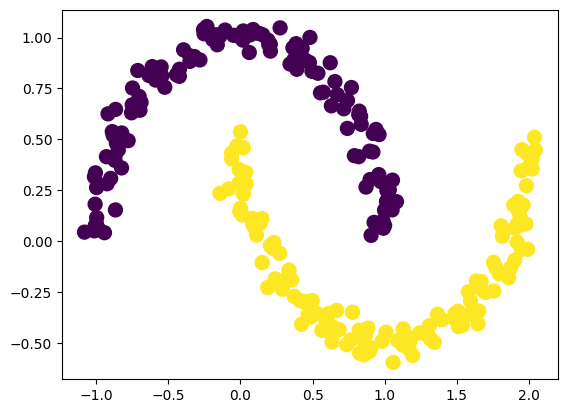

In [3]:
plt.scatter(X[:,0],X[:,1], c= y, s=100)
plt.show()

In [5]:
model= Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
model.get_weights()

[array([[ 0.66760224, -0.45198178, -0.6353079 , -0.09188724,  0.3352633 ,
          0.4704557 ,  0.6732158 , -0.44903404, -0.6070134 ,  0.12048823],
        [ 0.0798192 , -0.45826453,  0.04401398, -0.6185357 , -0.4051821 ,
          0.13035971, -0.6977655 ,  0.08991104, -0.43539783, -0.49851814]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.3308869 ,  0.13980603, -0.10868528, -0.25574023,  0.33607018,
         -0.13338521,  0.04106057,  0.2285074 ,  0.325248  ,  0.49800098],
        [ 0.16468811,  0.0005542 ,  0.54235744, -0.40472603,  0.24003083,
         -0.19797704, -0.10329568,  0.29334062, -0.45770591,  0.02589256],
        [-0.3662554 ,  0.13568616,  0.33484238, -0.05425274,  0.3791842 ,
          0.30623388,  0.19171685, -0.14330423, -0.14342907, -0.3560495 ],
        [ 0.21921599, -0.2600573 , -0.30328324, -0.09452909,  0.16481352,
          0.24042886,  0.21415251,  0.2299636 ,  0.4717152 , -0.48166698],
        [ 0.04735

In [8]:
model.get_weights()[0]

array([[ 0.66760224, -0.45198178, -0.6353079 , -0.09188724,  0.3352633 ,
         0.4704557 ,  0.6732158 , -0.44903404, -0.6070134 ,  0.12048823],
       [ 0.0798192 , -0.45826453,  0.04401398, -0.6185357 , -0.4051821 ,
         0.13035971, -0.6977655 ,  0.08991104, -0.43539783, -0.49851814]],
      dtype=float32)

In [9]:
old_weights = model.get_weights()[0]

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
model.fit(X_train,y_train,epochs=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4865 - loss: 0.7299


In [12]:
new_weights = model.get_weights()[0]

In [13]:
model.optimizer.get_config()["learning_rate"]

0.0010000000474974513

In [14]:
#Finding Gradient

gradient = (old_weights - new_weights)/0.001
percent_change = abs(100*(old_weights - new_weights)/old_weights)

In [15]:
gradient

array([[-0.01215935, -0.00342727,  0.01603365,  0.02492964,  0.0244081 ,
         0.03752112, -0.00691414, -0.04714727,  0.03248453, -0.01292676],
       [ 0.00850111,  0.00202656, -0.01020729, -0.01257658, -0.01358986,
        -0.02248585,  0.00464916,  0.02814829, -0.02107024,  0.00688434]],
      dtype=float32)

In [17]:
old_weights

array([[ 0.66760224, -0.45198178, -0.6353079 , -0.09188724,  0.3352633 ,
         0.4704557 ,  0.6732158 , -0.44903404, -0.6070134 ,  0.12048823],
       [ 0.0798192 , -0.45826453,  0.04401398, -0.6185357 , -0.4051821 ,
         0.13035971, -0.6977655 ,  0.08991104, -0.43539783, -0.49851814]],
      dtype=float32)

In [18]:
new_weights

array([[ 0.6676144 , -0.45197836, -0.63532394, -0.09191217,  0.3352389 ,
         0.47041818,  0.6732227 , -0.4489869 , -0.6070459 ,  0.12050115],
       [ 0.0798107 , -0.45826656,  0.04402418, -0.6185231 , -0.4051685 ,
         0.1303822 , -0.6977702 ,  0.0898829 , -0.43537676, -0.49852502]],
      dtype=float32)

In [19]:
percent_change

array([[0.00182135, 0.00075828, 0.00252376, 0.02713069, 0.00728028,
        0.00797549, 0.00102703, 0.01049971, 0.00535153, 0.01072865],
       [0.01065046, 0.00044222, 0.02319103, 0.00203328, 0.00335401,
        0.01724908, 0.00066629, 0.03130683, 0.00483931, 0.00138096]],
      dtype=float32)

In [21]:
# Very small change in Percentage
# Let's change epochs to 100 to see how loss changes

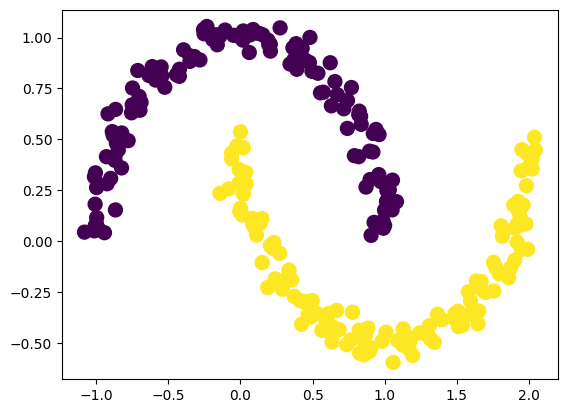

In [28]:
X,y = make_moons(n_samples = 250, noise = 0.05, random_state=42)
plt.scatter(X[:,0],X[:,1], c= y, s=100)
plt.show()

In [29]:
model= Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.get_weights()[0]

array([[ 0.32128912, -0.5545743 , -0.4585535 , -0.43167222, -0.48640984,
         0.10426354, -0.0283758 , -0.07456839, -0.3003757 , -0.56045276],
       [-0.25448334, -0.6194831 , -0.41235667, -0.13539404,  0.6779502 ,
         0.5980007 , -0.5591587 , -0.6223614 , -0.6799713 , -0.3147754 ]],
      dtype=float32)

In [31]:
old_weights = model.get_weights()[0]

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
history=model.fit(X_train,y_train,epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4813 - loss: 0.9685
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5040 - loss: 0.9097 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4814 - loss: 0.9167 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4989 - loss: 0.8722 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4690 - loss: 0.8889 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4957 - loss: 0.8396 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4761 - loss: 0.8442 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5388 - loss: 0.7671 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4723 - loss: 0.8183 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4751 - loss: 0.8014 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5024 - loss: 0.7672 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4818 - loss

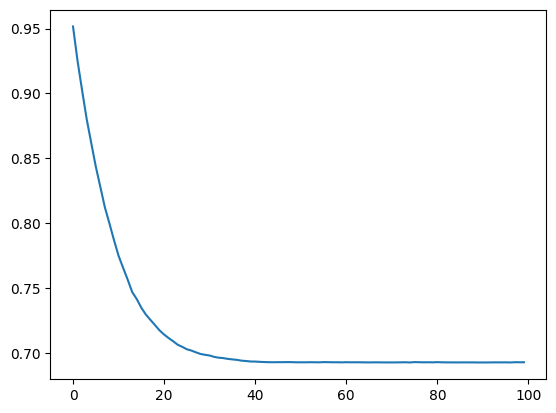

In [34]:
plt.plot(history.history['loss'])